In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Madhu Kotturu\OneDrive\Desktop\TiTanic_Survival_Prediction\tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df['TicketPrefix'] = df['Ticket'].str.extract(r'([A-Za-z\.\/]+)')

# Extract ticket number lengths
df['TicketLength'] = df['Ticket'].apply(len)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketPrefix,TicketLength
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,6
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,6
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,6
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,6
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,7


In [6]:
df['Ticket'].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [7]:
df.size

5852

In [8]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TicketPrefix',
       'TicketLength'],
      dtype='object')

In [9]:
df.dtypes


PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
TicketPrefix     object
TicketLength      int64
dtype: object

In [10]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
TicketPrefix    296
TicketLength      0
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,TicketLength
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188,6.875598
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576,2.821437
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,3.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,5.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,6.000000
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000,8.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,18.000000


In [12]:
df['Survived'].value_counts()


Survived
0    266
1    152
Name: count, dtype: int64

<Axes: ylabel='count'>

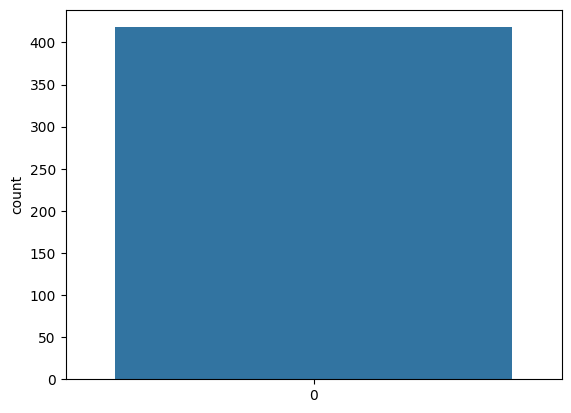

In [13]:
sns.countplot(df['Survived'])

<Axes: ylabel='count'>

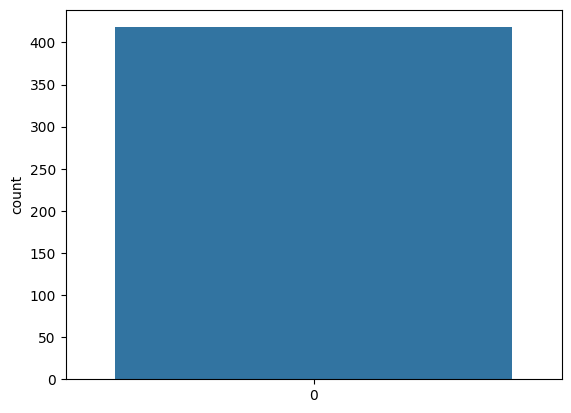

In [14]:
sns.countplot(df['Pclass'])

<Axes: xlabel='Survived', ylabel='count'>

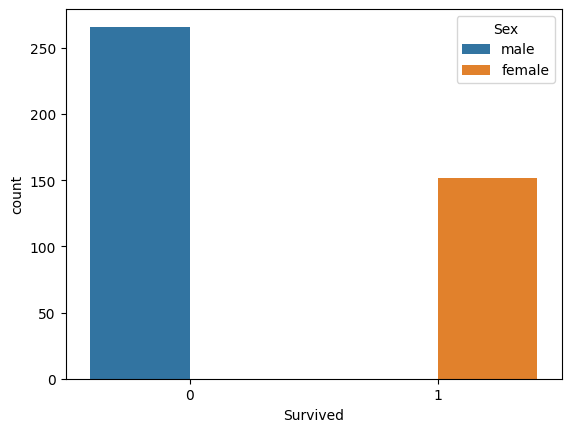

In [15]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

<Axes: xlabel='Survived', ylabel='count'>

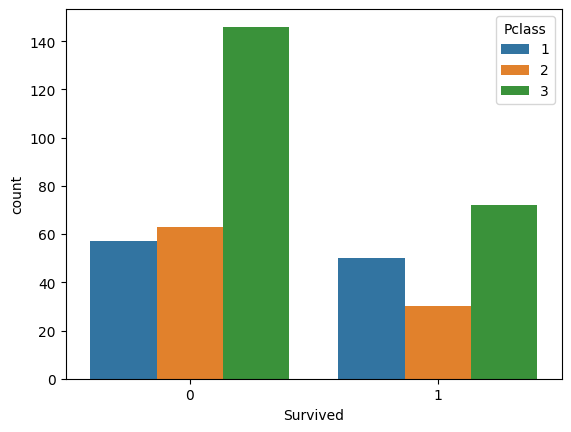

In [16]:
sns.countplot(x = "Survived", hue = 'Pclass', data =df)

<Axes: xlabel='Sex', ylabel='Pclass'>

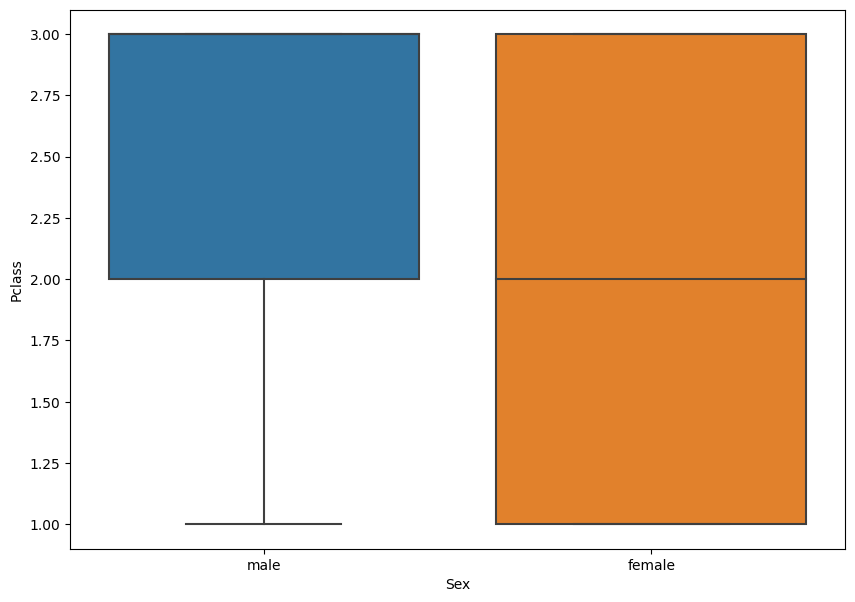

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'Sex', y = 'Pclass', data = df)

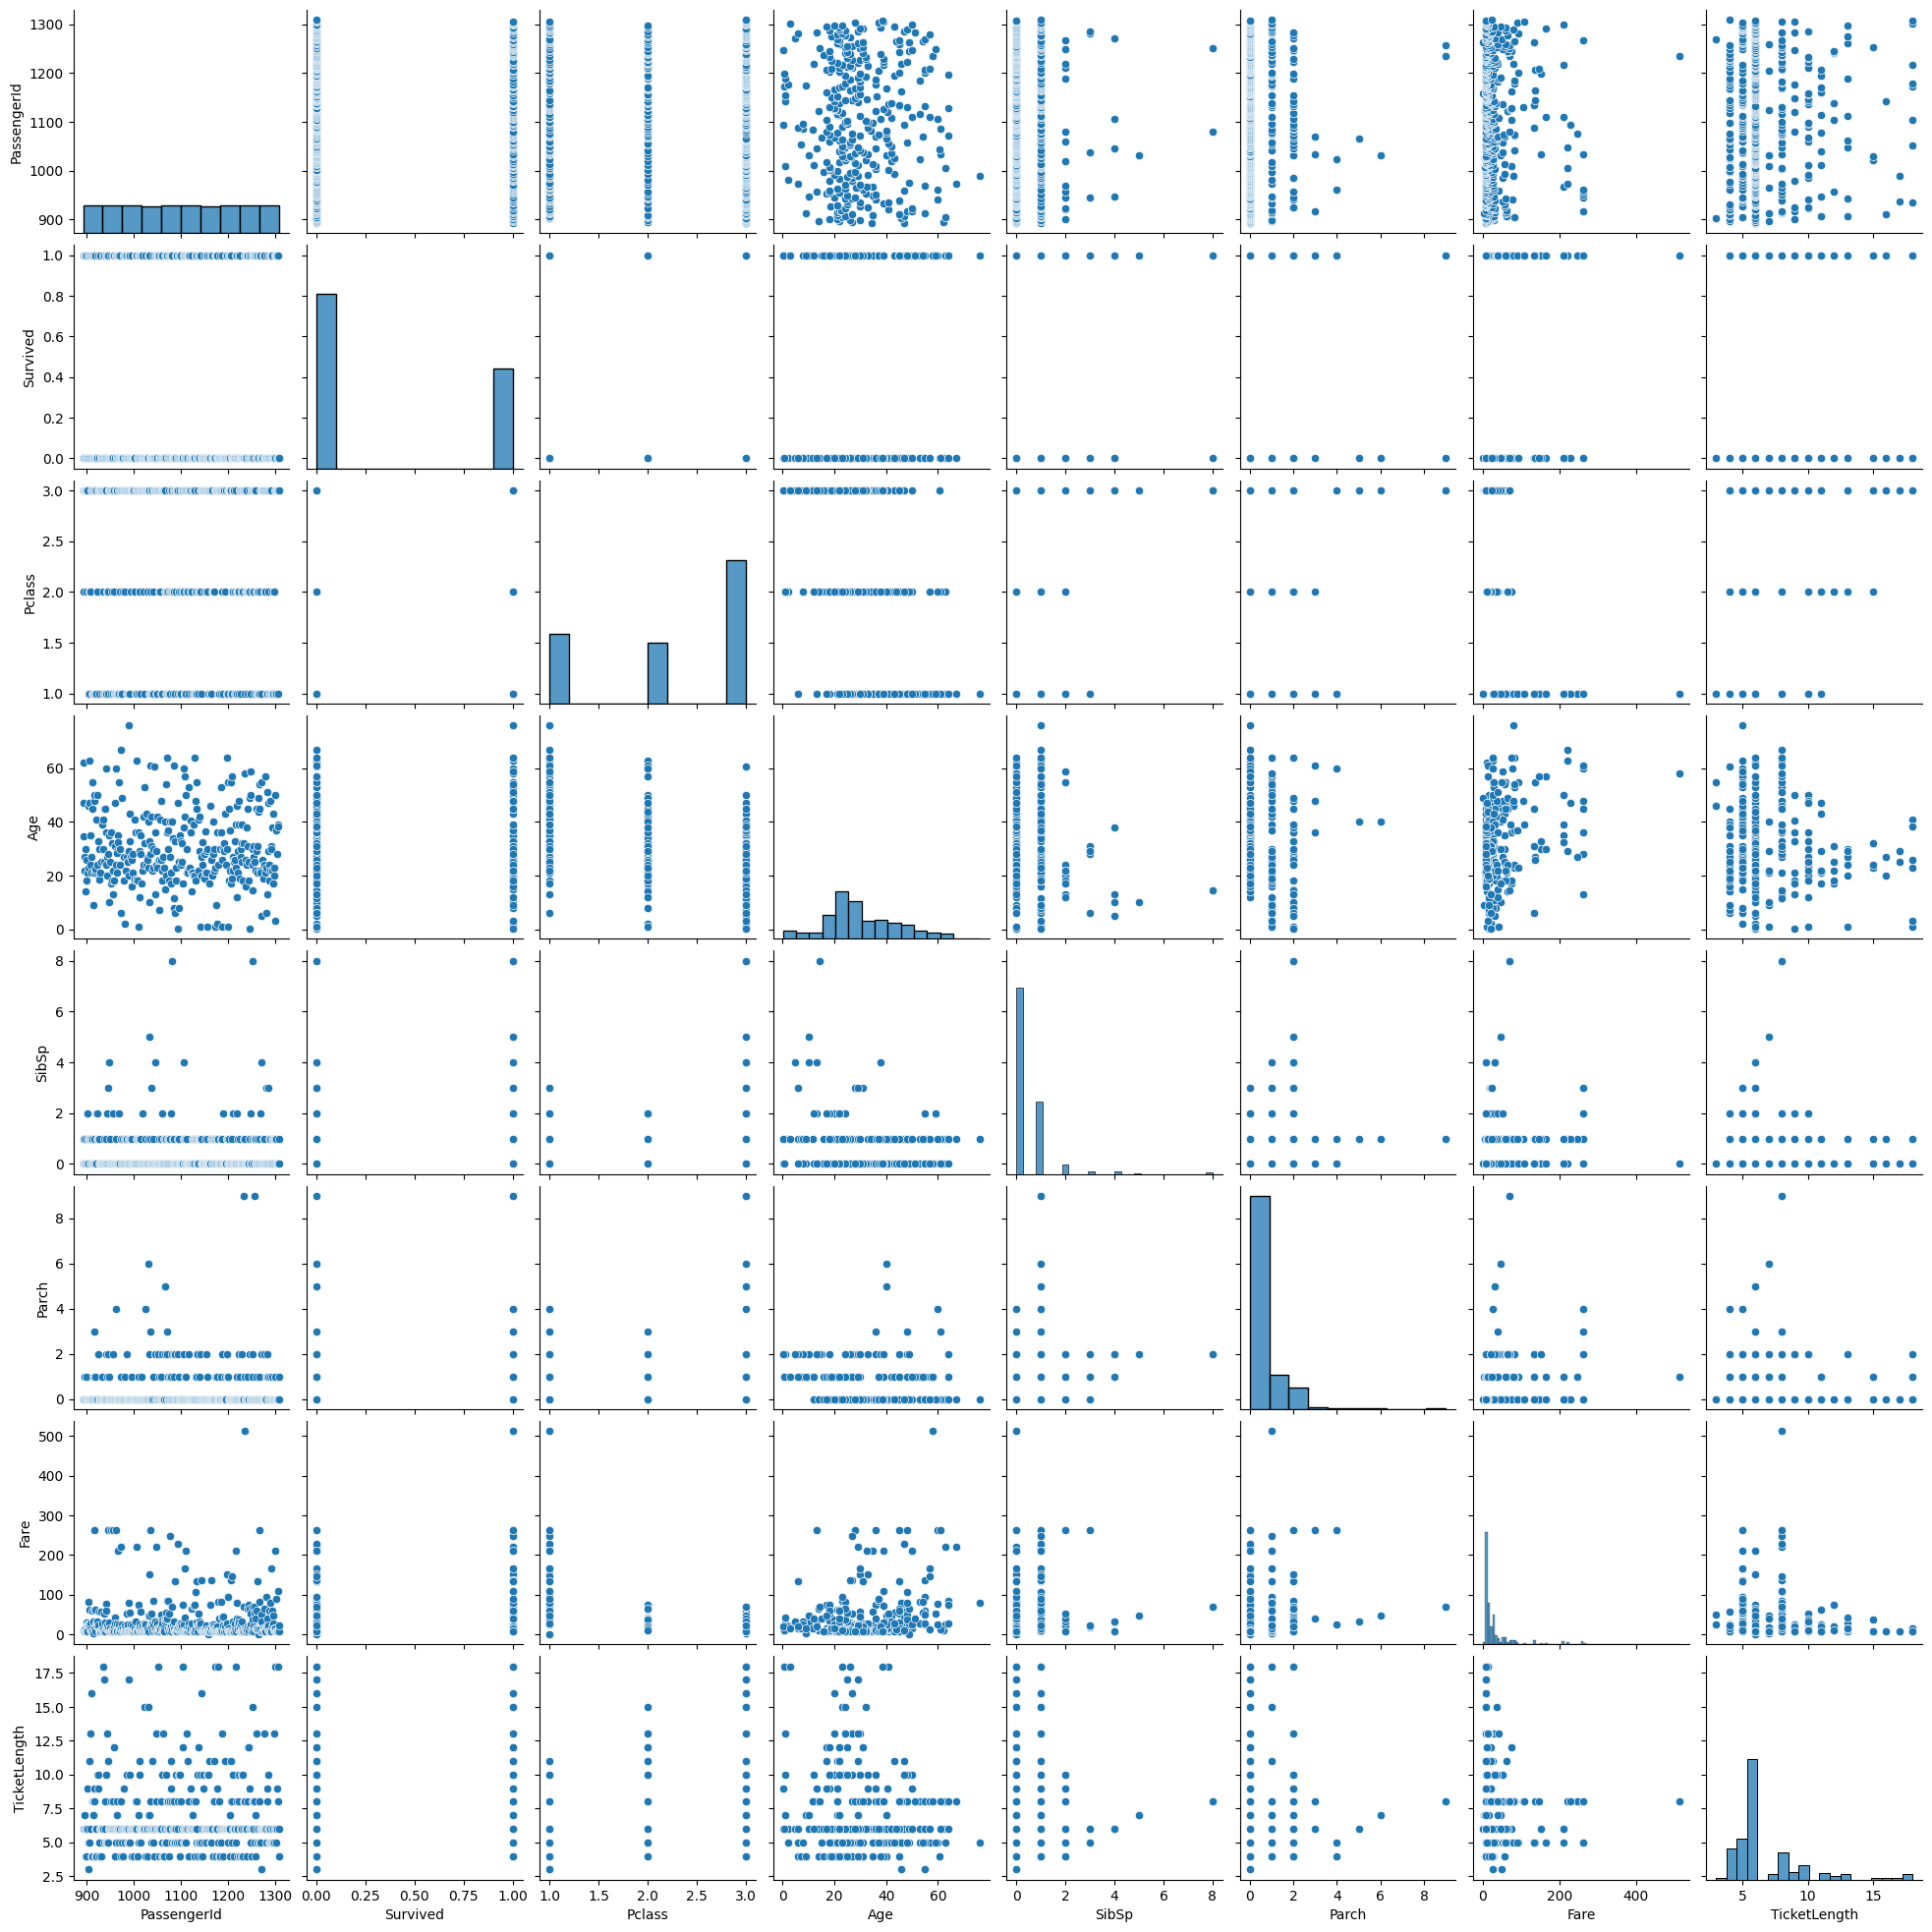

In [18]:
sns.pairplot(df)

In [19]:
#hist=df.hist(figsize = (15,15))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Survived      418 non-null    int64  
 2   Pclass        418 non-null    int64  
 3   Name          418 non-null    object 
 4   Sex           418 non-null    object 
 5   Age           332 non-null    float64
 6   SibSp         418 non-null    int64  
 7   Parch         418 non-null    int64  
 8   Ticket        418 non-null    object 
 9   Fare          417 non-null    float64
 10  Cabin         91 non-null     object 
 11  Embarked      418 non-null    object 
 12  TicketPrefix  122 non-null    object 
 13  TicketLength  418 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 45.8+ KB


<Axes: xlabel='Fare'>

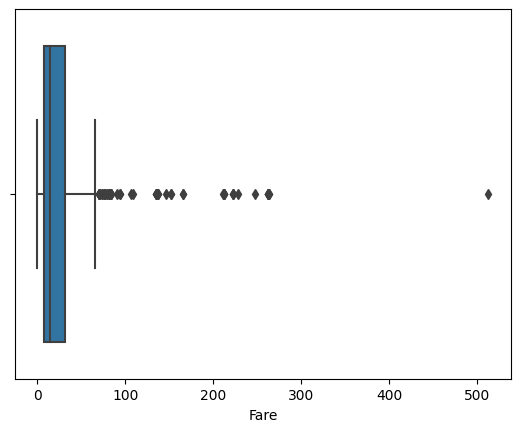

In [21]:
sns.boxplot(x = df['Fare'])

In [22]:
q1 = df['Fare'].describe()[4]
q3 = df['Fare'].describe()[6]
print(q1,q3)

iqr = q3 -q1 
lf= q1 - 1.5*iqr
uf =q3 + 1.5*iqr
print(lf,uf)

7.8958 31.5
-27.5105 66.9063


In [23]:
df[((df['Fare'] < -27.5105) | (df['Fare'] >66.9063))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketPrefix,TicketLength
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,NaN,5
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,PC,8
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,NaN,5
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,NaN,5
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,PC,8
64,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,PC,8
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S,NaN,5
74,966,1,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C,NaN,6
75,967,0,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C,NaN,6
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S,PC,8


In [24]:
df1 = df[((df['Fare'] > -27.5105) & (df['Fare'] < 66.9063))]

In [25]:
df1.shape

(362, 14)

In [26]:
len(df)- len(df1)

56

<Axes: >

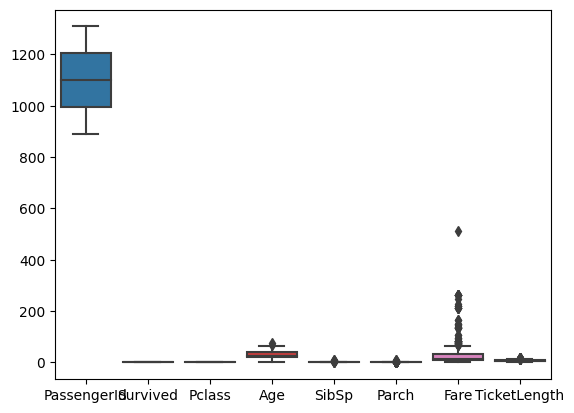

In [27]:
sns.boxplot(df)

<Axes: xlabel='Fare'>

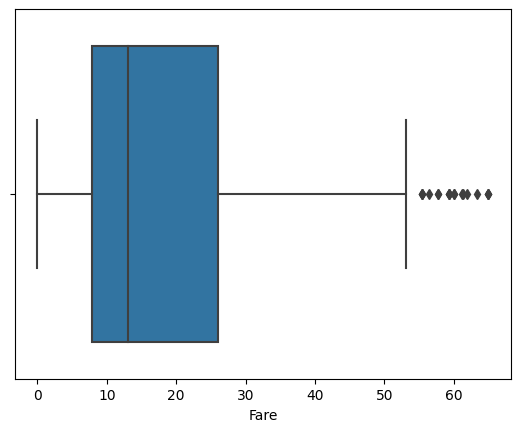

In [28]:
sns.boxplot(x = df1['Fare'])

In [29]:
df1.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              83
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           315
Embarked          0
TicketPrefix    265
TicketLength      0
dtype: int64

In [30]:
df1 = df1.drop('Cabin' , axis = 1)

In [31]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TicketPrefix,TicketLength
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,NaN,6
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,NaN,6
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,NaN,6
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,NaN,6
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,NaN,7


In [32]:
df1['Age'] = df1['Age'].fillna(method='ffill')

In [33]:
df1.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
TicketPrefix    265
TicketLength      0
dtype: int64

In [34]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TicketPrefix,TicketLength
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,NaN,6
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,NaN,6
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,NaN,6
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,NaN,6
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,NaN,7


In [35]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
TicketPrefix    296
TicketLength      0
dtype: int64

In [36]:
df1 = df1.drop(['Name','PassengerId', 'Ticket'], axis =1)

In [37]:
df2 = df1.copy()

In [38]:
df2.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketLength
0,0,3,male,34.5,0,0,7.8292,Q,NaN,6
1,1,3,female,47.0,1,0,7.0000,S,NaN,6
2,0,2,male,62.0,0,0,9.6875,Q,NaN,6
3,0,3,male,27.0,0,0,8.6625,S,NaN,6
4,1,3,female,22.0,1,1,12.2875,S,NaN,7


In [39]:
df2['Embarked'].value_counts()

Embarked
S    246
C     71
Q     45
Name: count, dtype: int64

In [40]:
df2['Sex'] = df2['Sex'].replace({'male': 0, 'female': 1})

In [41]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketLength
0,0,3,0,34.5,0,0,7.8292,Q,NaN,6
1,1,3,1,47.0,1,0,7.0000,S,NaN,6
2,0,2,0,62.0,0,0,9.6875,Q,NaN,6
3,0,3,0,27.0,0,0,8.6625,S,NaN,6
4,1,3,1,22.0,1,1,12.2875,S,NaN,7


In [42]:
encoded_df = pd.get_dummies(df2[['Embarked']])

In [43]:
df3 = pd.concat([df2, encoded_df], axis=1)


In [44]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketPrefix,TicketLength,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,34.5,0,0,7.8292,Q,NaN,6,False,True,False
1,1,3,1,47.0,1,0,7.0000,S,NaN,6,False,False,True
2,0,2,0,62.0,0,0,9.6875,Q,NaN,6,False,True,False
3,0,3,0,27.0,0,0,8.6625,S,NaN,6,False,False,True
4,1,3,1,22.0,1,1,12.2875,S,NaN,7,False,False,True


In [45]:
df4 = df3.drop(['Embarked','TicketPrefix'], axis = 1)

In [46]:
df4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TicketLength,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,34.5,0,0,7.8292,6,False,True,False
1,1,3,1,47.0,1,0,7.0000,6,False,False,True
2,0,2,0,62.0,0,0,9.6875,6,False,True,False
3,0,3,0,27.0,0,0,8.6625,6,False,False,True
4,1,3,1,22.0,1,1,12.2875,7,False,False,True


In [47]:
df4.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
TicketLength    0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [48]:
x = df4.drop('Survived', axis =1)
y = df4['Survived']

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [50]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [51]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        23

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [52]:
# assigning  the test input in a variable  for prediction
test_input = [[3, 0, 34.5, 0, 0,7.8292, 6, 0, 1, 0]]
test_input1 = [[3,1,47,1,0,7,6,0,0,1]]




In [53]:
#test case for survival  - 0

prediction = clf.predict(test_input)
print(f"Prediction: {prediction}")

Prediction: [0]


C:\Users\Madhu Kotturu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [54]:
#test case for survival - 1

prediction1 = clf.predict(test_input1)
print(f"Prediction: {prediction1}")

Prediction: [1]


C:\Users\Madhu Kotturu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
